In [1]:
import operator
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

from  pathlib import Path
import projet3
from projet3 import utils


# TODO: demander à l'utilisateur la quantité de chaque produit
# TODO: sur la quantité de chaque produit refaire les ratios
# TODO: Camenbert apport d'energie par macro nutriment

columns_mg = ["vitamin-a_100g", "vitamin-c_100g", "iron_100g"]

def get_kcal(sample):
    new_sample = sample.copy()
    new_sample["lipide"] = (
            (new_sample["fat_100g"] + 
             new_sample["saturated-fat_100g"] + 
             new_sample["cholesterol_100g"] + 
             new_sample["trans-fat_100g"]) * 9)
    new_sample["glucide"] = (
            (new_sample["sugars_100g"] + 
             new_sample["carbohydrates_100g"]) * 4)
    new_sample["proteine"] = (new_sample["proteins_100g"] * 4)
    new_sample["alcohol"] = (new_sample["alcohol_100g"] * 4)
    return new_sample[["lipide", "glucide", "proteine", "alcohol"]]


def get_metrics(data, codes, columns):
    # faire le ratio, 
    quantity = data["serving_quantity"]
    
    for c in columns_mg:
        data[c] *= 1000
    sum_ = data[columns].mean()
    return sum_
    
def get_reference(data, columns):
    # TODO les donnes doivent etre cleanés
    reference = data[data["nutrition_grade_fr"] == "a"]
    # nutrition_score, nutrition_score_uk 
    #reference = reference[utils.make_filter(reference, *columns)]
    for c in columns:
        reference = reference[(reference[c] <= 100)&(reference[c]>=0)]
    for c in columns_mg:
        reference[c] *= 1000
    return reference[columns].mean()
    
def plot_radar(current_data):
    labels = columns
    fig = plt.figure()
    stats_ = current_data
    
    angles=np.linspace(0, 2*np.pi, len(columns), endpoint=False)
    
    stats = np.concatenate((stats_,[stats_[0]]))
    angles = np.concatenate((angles,[angles[0]]))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    name = "Composition"
    ax.set_title(name)
    ax.grid(True)

In [2]:
# les colonnes retenues
columns = ['fat_100g', 'saturated-fat_100g', 'sugars_100g', 
           'carbohydrates_100g', 'proteins_100g','salt_100g',  
           'calcium_100g', 'cholesterol_100g',
           'trans-fat_100g', 'iron_100g', 'vitamin-c_100g', 
           'vitamin-a_100g', 'alcohol_100g']

In [3]:
data_folder = Path(projet3.__file__).with_name("data")
results_folder = Path(projet3.__file__).with_name("results")

data = data_folder / "en.openfoodfacts.org.products.csv"
data_df = pd.read_csv(data.as_posix(), sep="\t")
data_for_ref = pd.read_csv(results_folder.joinpath("complete_data.csv"))


/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,24,25,26,28,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Aliment de refernce nutiscore à A
#TODO: sur quel sour

In [5]:
print("HEADE")
data_df.head(10)

HEADE


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000178,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1542456332,2018-11-17T12:05:32Z,1542456333,2018-11-17T12:05:33Z,Mini coco,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000000208,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1544207680,2018-12-07T18:34:40Z,1544207683,2018-12-07T18:34:43Z,Pistou d'ail des ours,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0000000000284,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1547120245,2019-01-10T11:37:25Z,1563551052,2019-07-19T15:44:12Z,Pain maïs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1565268412,2019-08-08T12:46:52Z,Salade de carottes râpées,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000000000970,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1520506368,2018-03-08T10:52:48Z,1561463726,2019-06-25T11:55:26Z,Fromage blanc aux myrtilles,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
sample = data_df.sample(5)
codes = sample["code"]
sum_ = sample.sum()

# Analyse de la composition d'un repas, composé de plusiuers produits

In [7]:
print("Reference")
reference = get_reference(data_df, columns)

Reference


In [8]:
reference

fat_100g               4.874375
saturated-fat_100g     0.682625
sugars_100g            4.771250
carbohydrates_100g    28.481250
proteins_100g          7.510625
salt_100g              0.569830
calcium_100g           0.077287
cholesterol_100g       0.139706
trans-fat_100g         0.025000
iron_100g              1.586375
vitamin-c_100g         4.808688
vitamin-a_100g         0.166063
alcohol_100g           0.000000
dtype: float64

## Données brutes

In [9]:
print('SAMPLE')
sample[["product_name"]]

SAMPLE


,product_name
654254,NaN
118057,Cut & Peeled Baby Carrots
514683,Recette à l'ancienne Crème & poivre
771528,Monterio White Porto
339011,Panzani Mini Penne


In [10]:
print("Metrics bruts")
metrics_brut = get_metrics(sample, codes=list(codes), columns=columns)
metrics_brut

Metrics bruts


fat_100g              13.000000
saturated-fat_100g     1.875000
sugars_100g            4.193333
carbohydrates_100g    43.803333
proteins_100g          6.426667
salt_100g              0.635347
calcium_100g                NaN
cholesterol_100g            NaN
trans-fat_100g         0.000000
iron_100g                   NaN
vitamin-c_100g              NaN
vitamin-a_100g              NaN
alcohol_100g                NaN
dtype: float64

Comparaison repas/reference


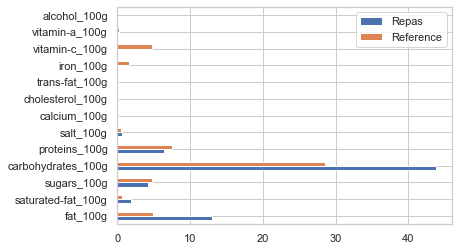

In [11]:
print('Comparaison repas/reference')
sns.set_color_codes("pastel")
sns.set(style="whitegrid")
data_metrics = pd.DataFrame({"Repas": metrics_brut, "Reference": reference})
data_metrics.plot.barh()
plt.show()

Radar donnée brut


/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/matplotlib/projections/polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


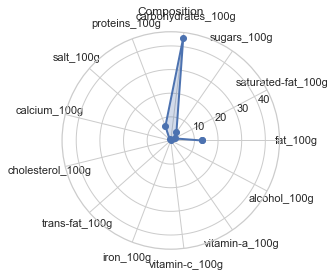

In [12]:
print("Radar donnée brut")
plot_radar(metrics_brut)


## Données relatives

In [13]:
relative_metrics = metrics_brut / reference

sns.set_color_codes("pastel")
sns.set(style="whitegrid")

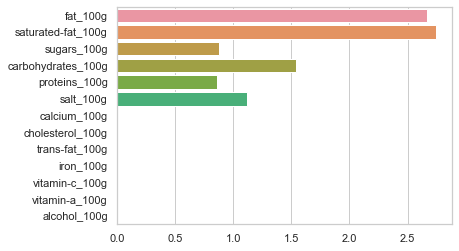

In [14]:
sns.barplot(y=relative_metrics.index, x=relative_metrics.values)

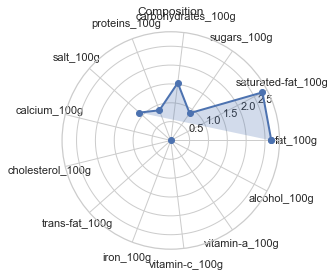

In [15]:
plot_radar(relative_metrics)


# Repartition energétique

In [16]:
# print repas
sample_c = get_kcal(metrics_brut)

In [17]:
sample_c.describe()

count      2.000000
mean     108.846667
std      117.577716
min       25.706667
25%       67.276667
50%      108.846667
75%      150.416667
max      191.986667
dtype: float64

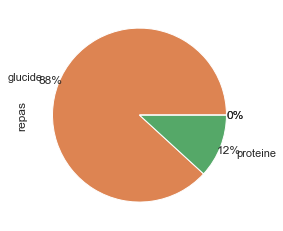

In [18]:
sample_c.plot.pie(label="repas", autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

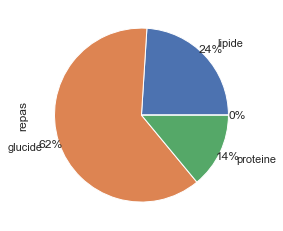

In [19]:
# print reference
sample_c = get_kcal(reference)
sample_c.plot.pie(label="repas", autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)